# Import
---

  우리가 사용할 cupy,cudf,cuml등을 임포트합니다.

In [1]:
import cupy as cp
import cudf as cd
import cuml as cm

## Simple Test

In [2]:
X_cp = cp.array([1,2,3,4,5,6,7,8,9])
y_cp = cp.array([11,22,33,44,53,66,77,87,95])

print("X : ", X_cp)

!nvidia-smi

X :  [1 2 3 4 5 6 7 8 9]
Mon Aug  3 02:09:38 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.100      Driver Version: 440.100      CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1050    Off  | 00000000:01:00.0 Off |                  N/A |
| N/A   51C    P0    N/A /  N/A |    642MiB /  4042MiB |      3%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                   

## Matplot ploting
---
물론 RAPIDS용 비주얼라이제이션 툴이 있습니다만, 우선은 matplot에서 찍어보겠습니다

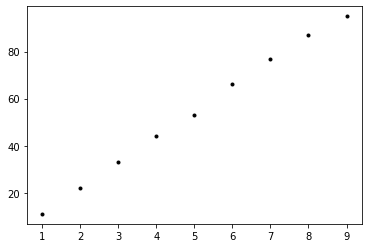

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.plot(X_cp.get(), y_cp.get(), 'k.')

## Supplemental Test
---
<br>
GPU사용보다 CPU사용이 더 나은 경우도 물론 있습니다.

Nvidia DLI에서 밝히기로는, 보통은 GPU에 맞춰서 데이터를 가공하지 못했거나, 잘못된 코드 사용, 너무 적은 데이터로 사용 등이 그 이유에 해당된다고 하는데요, 그 중 너무 적은 데이터의 사용에 대해서, 몇가지 간단한 테스트를 해보겠습니다.

In [4]:
import cupy as cp
import numpy as np

### N이 100일 때

In [5]:
n = 100

In [6]:
%%time
a = np.random.rand(n,n)
b = np.random.rand(n,n)

result = np.matmul(a,b)

CPU times: user 923 µs, sys: 8.33 ms, total: 9.26 ms
Wall time: 2 ms


In [7]:
%%time
a = cp.random.rand(n,n)
b = cp.random.rand(n,n)

result = cp.matmul(a,b)

CPU times: user 317 ms, sys: 116 ms, total: 434 ms
Wall time: 228 ms


### N이 1000일 때

In [8]:
n = 1000

In [9]:
%%time
a = np.random.rand(n,n)
b = np.random.rand(n,n)

result = np.matmul(a,b)

CPU times: user 289 ms, sys: 32.1 ms, total: 321 ms
Wall time: 54.2 ms


In [10]:
%%time
a = cp.random.rand(n,n)
b = cp.random.rand(n,n)

result = cp.matmul(a,b)

CPU times: user 588 µs, sys: 237 µs, total: 825 µs
Wall time: 634 µs


### N이 10000일 때

In [11]:
n = 10000

In [12]:
%%time
a = np.random.rand(n,n)
b = np.random.rand(n,n)

result = np.matmul(a,b)

CPU times: user 2min 50s, sys: 3.77 s, total: 2min 54s
Wall time: 23.5 s


In [13]:
%%time
a = cp.random.rand(n,n)
b = cp.random.rand(n,n)

result = cp.matmul(a,b)

CPU times: user 10.8 ms, sys: 24.1 ms, total: 34.9 ms
Wall time: 17.1 ms
